<a href="https://colab.research.google.com/github/emilydiana/October7/blob/master/CIS545_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Project: The Tradeoff Between Predictive Power and Interpretability

One of the major cultural differences between statisticians and those studying One of the major critiques of 

For example, 

The goal of this project is to provide a disciplined comparison between two learning methods that have different advantages and disadvantages in regards to predictive power and interpretability: ranndom forests and linear regression for ordinal output.

Apriori, we would expect random forests to have greater prediction accuracy than linear regression, with the potential for overfitting. 

Regression can give us values and confidence intervals

Your main training set for this assignment is the text from 100,000 reviews from Amazon.com, their timestamps, and their star ratings. The high level goal of this homework is to use the textual and temporal data to predict the star ratings.

LASSO

first do it on toy dataset, then full

exploratory data anlysis on times

BERT compare to CNN

In [0]:
# install stuff
%%capture
!pip install -U gensim
!pip install urllib2
!pip install --upgrade scikit-learn

# check gensim version
import gensim
gensim.__version__

# import stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from gensim import corpora
from gensim.models import LsiModel, KeyedVectors
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.nmf import Nmf

import sklearn.model_selection as ms
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import linear_model, metrics, preprocessing

from datetime import *
from operator import itemgetter

In [0]:
%%capture
!wget https://cis.upenn.edu/~cis545/data/reviews.dict
!wget https://cis.upenn.edu/~cis545/data/train_reviews.mm
!wget https://cis.upenn.edu/~cis545/data/train_times.npy

In [0]:
reviews_dict = corpora.Dictionary.load("reviews.dict")
reviews_bow = corpora.MmCorpus('train_reviews.mm')
reviews_times  = np.load('train_times.npy')
reviews_times.shape = (len(reviews_bow),1)
y = np.vstack((np.repeat(1, 4000), np.repeat(2, 4000), np.repeat(3, 4000), np.repeat(4, 4000), np.repeat(5, 4000)))
y = np.repeat(y, 5)

In [0]:
def densify(sparse, columns):
    array = np.zeros((len(sparse),columns))
    i=0
    for doc in sparse:
      for (elem, freq) in doc:
        array[i, elem] = freq
      i+=1
    return array


In [0]:
#Create Training Set

def make_tfidf(reviews_bow):
    model = TfidfModel(reviews_bow, normalize=True)
    new_model = model[reviews_bow]
    return new_model

reviews_tfidf = make_tfidf(reviews_bow)
X_train, X_test, Y_train, Y_test = ms.train_test_split(np.asarray(reviews_tfidf), y, test_size=0.10, random_state = 1911)


# Why Logistic Regression? And Why Sklearn

In [0]:
#Xs = densify(X_train, len(reviews_dict))
#Ys = y_train


In [0]:
#mul_lr = mord.OrdinalRidge(alpha=0.001,
# 							fit_intercept=True,
#						 	normalize=False,
# 							copy_X=True,
# 							max_iter=None,
# 							tol=0.001,
# 							solver='auto').fit(Xs, ys)

In [0]:
#print('Mean Absolute Error of Ordinal Logistic Regression on Train Set %s' %
#      metrics.mean_absolute_error(mul_lr.predict(X), y))

In [0]:
#from sklearn import linear_model, metrics, preprocessing

#%time
#clf1 = linear_model.LogisticRegression(
#    solver='lbfgs',
#    multi_class='multinomial')
#clf1.fit(Xs, Ys)


Does it predict certain things poorly?
Time to run?
Interpretability?

Need to change number of iterations
Plot predictions for each class or choose randomly from each class to make sure that they are balanced

In [0]:
#print('Mean Absolute Error of LogisticRegression: %s' %
#      metrics.mean_absolute_error(clf1.predict(Xs), Ys))

#clf2 = mord.LogisticAT(alpha=1.)
#clf2.fit(Xs, ys)
#print('Mean Absolute Error of LogisticAT %s' %
#      metrics.mean_absolute_error(clf2.predict(Xs), ys))

#clf3 = mord.LogisticIT(alpha=1.)
#clf3.fit(Xs, ys)
#print('Mean Absolute Error of LogisticIT %s' %
#      metrics.mean_absolute_error(clf3.predict(Xs), ys))

#clf4 = mord.LogisticSE(alpha=1.)
#clf4.fit(Xs, ys)
#print('Mean Absolute Error of LogisticSE %s' %
#      metrics.mean_absolute_error(clf4.predict(Xs), ys))

In [0]:
#%time
#clf2 = linear_model.LogisticRegression(
#    solver='saga',
#    penalty='l1',
#    multi_class='multinomial')
#clf2.fit(Xs, Ys)

In [0]:
#print('Mean Absolute Error of LogisticRegression: %s' %
#      metrics.mean_absolute_error(clf2.predict(Xs), Ys))

The implicit regularization is L2, which tends to shrink the parameters but does not set them to zero. In constrast, an L1 penalty will set many parameters to 0. 

In [0]:
#%time
#clf3 = linear_model.LogisticRegression(
#    solver='saga',
#    penalty='elasticnet',
#    multi_class='multinomial',
#    l1_ratio = 1)
#clf3.fit(Xs, y_train)

#print('Mean Absolute Error of LogisticRegression: %s' %
#      metrics.mean_absolute_error(clf3.predict(Xs), Ys))

In [0]:
#Bootstrap coefficient distributions
#First, select coefficients that were nonzero in ALL 9 iterations

#display(len(clf2.coef_[0]))
#display(len(clf3.coef_[0]))


In [0]:
#pip install sklearn.utils.resample
#!pip install --upgrade scikit-learn
#import sklearn.utils.resample as resample
#from scipy.sparse import coo_matrix
#Experiment with this
def bootstrap(X, Y, iterations, n):
  models=[]
  base = linear_model.LogisticRegression(
    solver='saga',
    penalty='l1',
    multi_class='multinomial')
  for iter in range(iterations):
     new_X, new_Y = resample(X_train,Y_train,random_state=iter, n_samples=n)
     new_sparse = coo_matrix(densify(new_X, len(reviews_dict)))
     new_model = base.fit(new_sparse,new_Y)
     models.append(new_model)
  return models



In [0]:
#X_sparse = coo_matrix(Xs) 
#full_sparse =coo_matrix(np.asarray(reviews_tfidf))
#np.asarray(full_sparse)
models = bootstrap(X_train, Y_train, 10, 10000)
#new_X, new_Y = resample(X_train,Y_train,random_state=1, n_samples=1)
#X_train.shape
#new_X.shape
#new_dense = densify(new_X, len(reviews_dict))
#new_dense.shape
#new_Y.shape

In [15]:
dense_test = densify(X_test, len(reviews_dict))

for model in models:
  print('Mean Absolute Test Error of Multinomial LogisticRegression: %s' %
      metrics.mean_absolute_error(model.predict(dense_test), Y_test))
  
models

Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369
Mean Absolute Test Error of Multinomial LogisticRegression: 0.369


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_

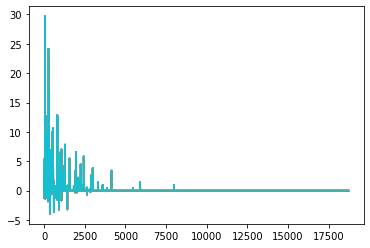

In [16]:
for model in models:
  plt.plot(model.coef_[0])

In [17]:
model.coef_.shape

(5, 18716)

In [0]:
averages = np.mean([models[0].coef_, models[1].coef_, models[2].coef_, models[3].coef_, models[4].coef_], axis=0)

#plt.plot(averages)

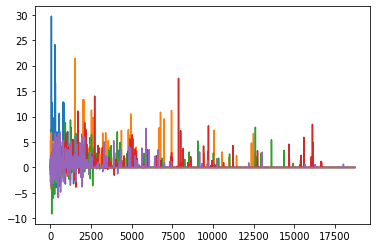

In [19]:
for i in range(5):
  plt.plot(averages[i])

In [20]:
!pip install scipy
from scipy.stats import sem

se = sem([models[0].coef_, models[1].coef_, models[2].coef_, models[3].coef_, models[4].coef_])

#plt.plot(se)

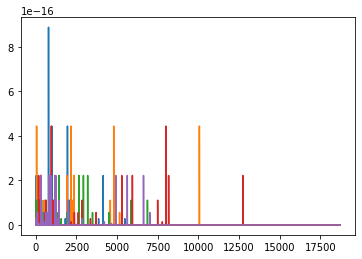

In [21]:
for elem in se:
  plt.plot(elem)

In [0]:
#confidence_intervals
upper = averages + 2*se
lower = averages - 2*se



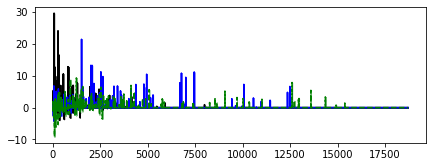

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
 
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

# plot the data
fig = plt.figure(1, figsize=(7, 2.5))

plot_mean_and_CI(averages[0], upper[0], lower[0], color_mean='k', color_shading='k')
plot_mean_and_CI(averages[1], upper[1], lower[1], color_mean='b', color_shading='b')
plot_mean_and_CI(averages[2], upper[2], lower[2], color_mean='g--', color_shading='g')

In [0]:
#find nonzero and names

In [0]:
z_scores = np.divide(averages, se, where=se!=0)

In [26]:
plt.plot(tstat[0])

NameError: ignored

In [0]:
pvalues = scipy.stats.norm.sf(abs(z_scores))*2

In [0]:
#vonferroni correction

alpha = 0.5/(len(reviews_dict)*5)
alpha

In [0]:
len(pvalues[4][pvalues[4]<alpha])
#find prediction accuracy

In [1]:
#Find words that are significant
sig_one = np.where(pvalues[0]<alpha)
sig_one = 

NameError: ignored

In [0]:
from sklearn import linear_model, metrics, preprocessing

%time
clf1 = linear_model.LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial')
clf1.fit(X_sparse, Ys)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print('Mean Absolute Error of LogisticRegression: %s' %
      metrics.mean_absolute_error(clf1.predict(Xs), Ys))

Mean Absolute Error of LogisticRegression: 0.1407


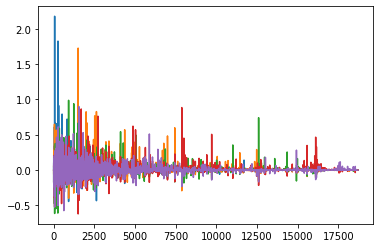

In [0]:
#len(clf1.coef_[0][clf1.coef_[0] !=0])
#plt.plot(clf1.coef_[0]) #ordering is very strange
#Xs[0][:10]
#np.asarray(reviews_bow)[0]
#reviews_dict[4]
#clf1.coef_[0][4]
#plt.plot(clf1.coef_[1])
#plt.plot(clf1.coef_[2])
#plt.plot(clf1.coef_[3])
#plt.plot(clf1.coef_[4])

(array([2042.,    0., 1971.,    0.,    0., 2022.,    0., 1911.,    0.,
        2054.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

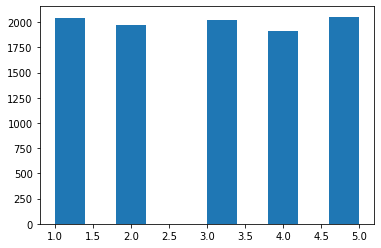

In [0]:
#len(clf1.coef_[0][clf1.coef_[0] !=0])
#preds = clf1.predict(Xs)
#plt.hist(preds)
#plt.hist(clf1.predict(Xs))

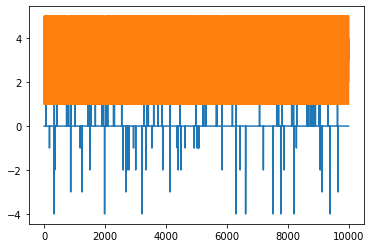

In [0]:
#plt.plot(ys-preds)

In [0]:
#import statsmodels.api as sm
#%time
#X=sm.add_constant(Xs)
#results = sm.OLS(y_train,X).fit()

In [0]:
#import statsmodels
#import statsmodels.api
#X=statsmodels.api.add_constant(Xs)
#%time
#model = statsmodels.discrete.discrete_model.MNLogit(Ys,X_sparse).fit_regularized(alpha=100)
#try with tfidf scores

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


ValueError: ignored

In [0]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2.664
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           1.52e-34
Time:                        20:33:40   Log-Likelihood:                 2748.3
No. Observations:               10000   AIC:                         1.364e+04
Df Residuals:                     431   BIC:                         8.264e+04
Df Model:                        9568                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2305      0.103     31.434      0.0

Try linear regression, plot residuals
Plot different alphas

0.0009216193378820404

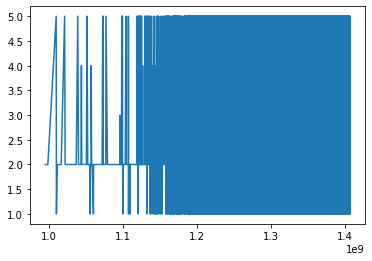

In [0]:
#Get data into appropriate form for linear regression
from sklearn.linear_model import LinearRegression
#len(y)
#X = np.array(reviews_dict)
#X = np.array(reviews_bow)
#X = np.array(reviews_times)
#X = pd.Series(np.ndarray.tolist(reviews_times))
#X = X.apply(lambda x : x[0])
#X = converted_times
#X = np.asarray(X)
#X = X.tolist()
#Y = y.tolist()
#display(type(X))
#display(type(y))
#display(type(X1))
#display(type(Y1))
#X1 = np.asarray([1,2]).tolist()
#Y1 = np.asarray([1,2]).tolist()
#display(type(X1))
#display(type(Y1))
#plt.plot(X1, Y1)
#plt.hist(X,y)
#y
#display(type(X))
#display(type(Y))
#X1
#simpleRegression = LinearRegression().fit(reviews_times, y)
#simpleRegression.score(reviews_times, y) ### very very low
#temp =X[:100]
#tempy = Y[:100]
#plt.plot(temp,tempy)
#len(reviews_times)

#blah = [reviews_times,y]

#X = pd.Series(np.ndarray.tolist(reviews_times))
X = reviews_times.flatten()
Y = y
p = np.argsort(X)
Y= y[p]
Y
X=X[p]
X

plt.plot(X,Y)
#plt.plot(X, Y)

simpleRegression = LinearRegression().fit(X.reshape(-1,1), Y)
simpleRegression.score(X.reshape(-1,1), Y) ### very very low



In [0]:
import statsmodels.api as sm
X = reviews_times.flatten()
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
#results.summmary()



UFuncTypeError: ignored

In [0]:

X1 = convert_times(reviews_times)
X1

#year

#month

#day

#hour



0       2012-05-06
1       2014-04-07
2       2012-07-17
3       2014-07-14
4       2013-05-16
           ...    
99995   2013-04-04
99996   2010-09-21
99997   2013-05-12
99998   2013-03-05
99999   2012-07-27
Length: 100000, dtype: datetime64[ns]

In [0]:
#Another regression
#simpleRegression = LinearRegression().fit(reviews_bow, Y)
reviews_bow
#simpleRegression.score(, Y) ### very very low


## Step 0: Explore the format

We will start with exploring the format of all of the data files that we imported above. 

### Step 0.1: gensim dictionary (lexicon)

Most data science over text has some form of vocabulary. Simply put, you need to decide which words your model will care about. Very rare words, misspellings, numbers, and urls are good candidates for exclusion, especially since if the model needs any form of normalization, the time complexity of such computations is at least linear in the size of the vocabulary, if not worse.

A lexicon associates each word in the vocabulary with an index. Since words are repeated, the model can save space by using the index for every repetition and only linking the index with the string form once. A `gensim` dictionary is special in that it is very fast and allows bidirectional lookups, namely, word to index and index to word.

After reviewing the [documentation](https://radimrehurek.com/gensim/corpora/dictionary.html), rewrite the right hand side of each line in the cell below with the answers to these questions.

1. In the `gensim` dictionary `reviews_dict`, what is the index of "best"? Look it up and store it in a variable named `best`. To clarify, if you find that 42 is the index of "best", change the line below so that it sets `best` equal to 42. Of course, you can do this with `best = 42` and earn full points, but it is a litte better to reuse the command with which you found the index. For example, if the `gensim` dictionary worked like a list of strings, you could do it with  
`best = reviews_dict.iloc('best')`.
2. What word belongs to index 1911? Look it up and store it in a variable named `onenineoneone`.
3. What happens when you evaluate `reviews_dict[i]` for some variable `i`? If this returns the word associated with that index, set `idx2word` to `True`. Otherwise, set it to `False`. For example, if `reviews_dict['best']` equals `best`, `idx2word` should be `False`, but if `reviews_dict[1911]` equals `onenineoneone`, `idx2word` should be `True`.

Hint: `token2id('best')` and `id2token(1911)` didn't work for me either. Keep trying!

### Step 0.2: Look up individual reviews

`gensim` represents everything in a **sparse** way. Namely, the representation of a review will be a variable-size list that contains counts of the words that _are present_ in the review. A **dense** representation, on the other hand, such as a matrix, would, in addition to the present words, contain zero counts for all of the words that are not in that particular review. For some examples, see [this tutorial](https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html).

But the optimizations don't stop there! `gensim` also saves space by not directly storing where one document ends and another begins. Such an implementation decision encourages users to stream the dataset through the user's pipeline, rather than attempt to read large chunks into memory. Put another way, you can iterate through the dataset using a loop or vectorized function, but you cannot index. In code:

`for doc in corpus` works!

`corpus[1911]` does not work!

On some occasions, though, it would be convenient for us to, say, look up the 1911th document directly.

So let's implement a function that iterates through the `gensim` `corpus`, collects every document whose index appears in `indices`, and returns that list of documents (subset of the dataset). For example, say we want the documents with the following indices: `indices = [0, 19, 11, 0]`. Then `lookup_docs` should return the 1st, 12th, and 20th documents, in that order.

To emphasize, if an index appears multiple times in `indices`, just return one copy. And for consistency with our autograder, please return the documents in order of increasing index. That would be be like `corpus[0]`, then `corpus[11]`, then `corpus[19]` in our example. Of course, that way to reference them doesn't work, though!

In [0]:
# answer 0.2 
def lookup_docs(corpus, indices):
  list = []
  count = 0
  for doc in corpus:
    if count in indices:
      list.append(doc)
    count +=1
  return list
    

Once you have written `lookup_docs`, you may run the cell below (no modification needed) to see how documents are represented in a gensim [corpus](https://radimrehurek.com/gensim/corpora/mmcorpus.html). In each review, `gensim` stores a tuple of size 2 for each distinct word in the review. The first number in the tuple is the index of the word in the dictionary and the second number in the tuple is the count of the times that word appeared in that review.

In [0]:
indices = [10,18]
docs = lookup_docs(reviews_bow, indices)

print(docs[0])
print(docs[1])

[(2, 1.0), (21, 1.0), (23, 1.0), (55, 1.0), (72, 1.0), (79, 1.0), (108, 1.0), (121, 1.0), (138, 1.0), (144, 1.0), (176, 1.0), (238, 1.0), (258, 1.0), (266, 3.0), (267, 1.0), (268, 2.0), (269, 1.0), (270, 1.0), (271, 1.0), (272, 3.0), (273, 1.0), (274, 1.0), (275, 1.0), (276, 1.0), (277, 1.0), (278, 2.0), (279, 1.0), (280, 1.0), (281, 1.0), (282, 1.0)]
[(5, 1.0), (11, 2.0), (14, 2.0), (17, 1.0), (24, 7.0), (30, 2.0), (31, 1.0), (49, 1.0), (50, 2.0), (51, 1.0), (60, 1.0), (71, 2.0), (82, 1.0), (87, 2.0), (105, 3.0), (144, 2.0), (164, 1.0), (165, 1.0), (177, 1.0), (179, 1.0), (181, 1.0), (186, 1.0), (218, 4.0), (224, 1.0), (233, 1.0), (241, 1.0), (258, 1.0), (348, 1.0), (373, 1.0), (379, 1.0), (382, 1.0), (383, 2.0), (384, 1.0), (385, 2.0), (386, 1.0), (387, 3.0), (388, 1.0), (389, 1.0), (390, 2.0), (391, 1.0), (392, 1.0), (393, 1.0), (394, 1.0), (395, 1.0), (396, 1.0), (397, 1.0), (398, 1.0), (399, 1.0)]


### Step 0.3: Make reviews more human-readable

Now, we would like you to write a function that takes a `gensim` bag of words document and its corresponding dictionary as input and returns a "translated" version that is more readable. The reviews are already represented as bags of words, so recall that you cannot recover the order of the words in the reviews. But, we would like you to spell out the repeats of each word. So, if the original review were "to be or not to be", `reviews_bow` would have something like:

`[(0, 2.0), (1, 1.0), (2, 1.0), (3, 2.0)]`

and we would like you to return the string

`"be be not or to to"`

In [0]:
# answer 0.3
def translate_review(review, reviews_dict):
    str=""
    for (elem, num) in review:
      for i in range(0,int(num)):
        str = str + reviews_dict[elem] + ' '
    return str.strip()

readable_1 = translate_review(docs[0], reviews_dict)
print(readable_1)

readable_2 = translate_review(docs[1], reviews_dict)
print(readable_2)

also hard just will replac use pet anyth time go stop want product cat cat cat cooler cut cut describ found groomer hair hair hair hot long need never poor shave shave shed summer though weather
away chewer chewer destroy destroy fast kong kong kong kong kong kong kong mix mix money tore toy toy tri dog regular regular worth bought bought one one one go go fine first take within chew rip like like like like probabl thing care product look two pound big bone bone chase dachshund dachshund durabl extrem extrem extrem five flyer frisbe frisbe habit mine minut power pretti realli sure version wobbler


### Step 0.4: Parse review times

It might be useful in predicting the scores of the reviews to know when the reviews were written. In this dataset, the day of the review was recorded as the number of seconds that passed between midnight on January 1, 1970 (the beginning of time for many computer systems) and the time the review was created. This may be efficient because it is one integer, but it is not very convenient. So we are going to convert these int objects to [datetime](https://docs.python.org/3/library/datetime.html) objects:

**Do not change `review_times` in any way. Work with other variables instead.**

#### Step 0.4.1: Convert times vector

The `convert_times` function should take in the entire `review_times` vector at once. It should return a new pandas `Series` object made from `review_times` but the entries should be of type `datetime` or `Timestamp`.

Hint: You might find `datetime.fromtimestamp` to be useful.

In [0]:
# answer 0.4.1
def convert_times(reviews_times):
  times = pd.Series(np.ndarray.tolist(reviews_times))
  times = times.apply(lambda x : datetime.fromtimestamp(x[0]))
  return times

In [0]:
converted_times = convert_times(reviews_times)
print("converted_times is a", type(converted_times))

converted_times is a <class 'pandas.core.series.Series'>


#### Step 0.4.2: Time math

The `days_before` function should take in one time value (after applying `convert_times`) and return a new time value that is exactly `offset` days before the input.

Hint: You might find `timedelta` to be useful.

In [0]:
# answer 0.4.2
def days_before(time_item, offset):
  return (time_item - timedelta(days=offset))
    

In [0]:
display(converted_times[0])
forty_days_before_review_times_0 = days_before(converted_times[0], 40)
display(forty_days_before_review_times_0)

## Step 1: How many components?

We will need to perform dimesionality reduction on our dataset before we can proceed further with the supervised task of predicting the star ratings. One of the greatest benefits of gensim is that it can decompose a sparse dataset directly. Indeed, they post some impressive numbers about their SVD speed [here](https://radimrehurek.com/gensim/models/lsimodel.html).

### Step 1.1: PCA on raw counts

We are first going to choose too many components deliberately, just to make sure that we see the whole picture. But note that 1000 components would still require us to store 100 million numbers. So that is probably too big for convenient exploration of the dataset.

#### Step 1.1.1: Train the PCA model

Train a gensim `LsiModel` on `reviews_bow` using `reviews_dict` as the dictionary and 1000 components. This magic number is provided as `max_cutoff`. The API is [here](https://radimrehurek.com/gensim/models/lsimodel.html).

**This step took about 4 minutes for my Colab instance to complete.**

In [0]:
# answer 1.1.1

max_cutoff = 1000
model = LsiModel(corpus = reviews_bow, id2word = reviews_dict, num_topics = max_cutoff)

#### Step 1.1.2: Extract the singular values

Look at the [API page](https://radimrehurek.com/gensim/models/lsimodel.html) to figure out how to get the singular values from a trained model. Feed those and `max_cutoff` to the `plot_variance_vs_components` function, which you do not have to edit.

In [0]:
def plot_variance_vs_components(singular_values, cutoff):
    evr = np.array([singular_values[i]**2 / sum(singular_values**2) for i in range(cutoff)])
    var = np.cumsum(evr*100)
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Components')
    plt.title('PCA Analysis')
    plt.style.context('seaborn-whitegrid')
    plt.plot(var)

In [0]:
# answer 1.1.2
singular_values = model.projection.s
singular_values
plot_variance_vs_components(singular_values, max_cutoff)

The good news is this curve is very steep in the beginning, which shows that a lot of information is conveyed in the first components. However, there is no plateau that we can use to choose a cutoff!

**So, let's go back to the dataset. Are the numbers in `reviews_bow` distributed sensibly?**

### Step 1.2: TF-IDF -- a better distribution

The function below allows us to visualize the distribution of the values in the bag of words. You do not need to edit it. Recall that there are no zero values by nature of the sparse representation. The function has two convenient features:

1. It allows you to transform the values uniformly using an optional second argument.
2. By subtracting the mean, the new mean will line up with $x=0$.

In [0]:
def plot_values(reviews, function=None):
    values = []
    for doc in reviews:
        for (word, score) in doc:
            if not function: values.append(score)
            else:            values.append(function(score))

    plt.hist(values - np.mean(values), bins='auto')
    plt.show()

In [0]:
plot_values(reviews_bow)

It appears that our values are very highly skewed. Therefore, minmax and standard scaling would not (yet) be appropriate. Let's see if we can make it look better by log scaling the values:

In [0]:
plot_values(reviews_bow, np.log)

It is a little better, but only a little bit. Perhaps a double log?

In [0]:
plot_values(reviews_bow, lambda x: np.log(np.log(x+1)))

Still not so good. There are (at least) two outstanding issues with this distribution:

1. The vast majority of words only occur once per review.
2. In the rare case that a word occurs more than once, we can't tell if that is because it is especially important or because it is a common word, like a stop word.

Therefore, we are going to convert our counts into [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) scores. Luckily, this is built in to `gensim` so this can be done in a couple lines of code. The API is [here](https://radimrehurek.com/gensim/models/tfidfmodel.html). Complete the function below that converts the data to TF-IDF scores. Note: that is a two step process. First, you need to initialize and fit a TF-IDF model to `reviews_bow`. (use default values for all hyperparameters **EXCEPT you should set `normalize=True`**). Then, you should apply your TF-IDF model to `reviews_bow` to transform it. Return the new version of the dataset.

In [0]:
# answer 1.2
def make_tfidf(reviews_bow):
    model = TfidfModel(reviews_bow, normalize=True)
    new_model = model[reviews_bow]
    return new_model

In [0]:
reviews_tfidf = make_tfidf(reviews_bow)

In [0]:
plot_values(reviews_tfidf)

This should look a lot better. Log scaling it may make the distribution look a bit more symmetrical, but this would come at the cost of collapsing some distinctions in the right tail, so we will not do it.

### Step 1.3: PCA on TF-IDF scores

Let's try the PCA again and plot a new variance versus number of components.

In [0]:
# answer 1.3
model_tfidf = LsiModel(corpus = reviews_tfidf, id2word = reviews_dict, num_topics = max_cutoff)
singular_values_tfidf = model_tfidf.projection.s
plot_variance_vs_components(singular_values_tfidf, max_cutoff)


If anything, this graph is less helpful than before. **So, instead, we would like to use downstream performance of the classifier to tune this hyperparameter.** So let's build the remaining pieces that we need.

## Step 2: Interface with sparse representations

To get the real benefit of dimensionality reduction, it is important to consider which pieces of the decomposition are actually needed. Then, we can simply throw away the rest. To help you become familiar with the different pieces we will fully decompose and reconstruct the toy dataset of 5 computer science and 4 math article titles using `gensim`. It will be important later on that you only apply the functions that you write in this section to the pieces that you need on the big dataset.

### Step 2.0: The sparse toy dataset

After lower casing, tokenizing, and stop wording, the corpus looks like `titles` in the cell below. Then, we create a dictionary and a sparse document-term matrix.

In [0]:
titles = [['human', 'interface', 'computer'],
          ['survey', 'user', 'computer', 'system', 'response', 'time'],
          ['eps', 'user', 'interface', 'system'],
          ['system', 'human', 'system', 'eps'],
          ['user', 'response', 'time'],
          ['trees'],
          ['graph', 'trees'],
          ['graph', 'minors', 'trees'],
          ['graph', 'minors', 'survey']]

titles_dict = corpora.Dictionary(titles)
titles_bow = [titles_dict.doc2bow(title) for title in titles]
display(titles_bow)

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

### Step 2.1: Sparse to dense

To get the term-document matrix that we have seen in lecture, we need to convert this matrix to its dense form. Write a function `densify` that takes as input:

1. a sparse matrix in the format of `titles_bow` above
3. an integer number of columns

and returns a NumPy array. Note that `titles_bow` is a document-term matrix, not a term-document matrix, so we transpose it in the test cell to show the matrix from lecture (with the rows and columns slightly reordered).

You may not use the `corpus2dense` function from `gensim`.

In [0]:
# answer 2.1
def densify(sparse, columns):
    array = np.zeros((len(sparse),columns))
    i=0
    for doc in sparse:
      for (elem, freq) in doc:
        array[i, elem] = freq
      i+=1
    return array

In [0]:
td = densify(titles_bow, len(titles_dict)).transpose()
print(td)
print(td.shape)
print (titles_bow)

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]
(12, 9)
[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


In [0]:
#MINI REGRESSION ON TD
#There are 12 reviews with 9 relevant words each
#First, find the predictions
#sklearn.linear_model.LinearRegression

reviews_tfidf

### Step 2.2: Toy PCA reconstruction

In the cell below, write a function called `reconstruction` that takes as input:

1. a sparse matrix
2. a gensim dictionary
2. a cutoff for PCA

The function should compute an `LsiModel` and reconstruct the original matrix. 

**There is something unexpected about the correct solution to this part!**

Before turning to Piazza, print the dimensions of the pieces that you are working with, using `.shape`. What are the dimensions of the original? What are the dimensions of the outputs from `LsiModel`? How can you multiply the pieces together to get a match? You can do this! We have faith in you!

Note that there could be a loss because the function only computes the part of the singular value decomposition that is needed according to `cutoff`. So after reconstructing, let's quantify the loss: compute the difference between the reconstructed matrix and the original. Then, take the Frobenius norm of that difference matrix. Divide by the Frobenius norm of the original. Make this the return value for the function.

Hint: The right singular vectors ($V$ or `model[sparse]`) already contain the singular values ($S$ or `model.projection.s`) so don't include them again!

In [0]:
# answer 2.2
def PCA_reconstruction(sparse, gsdict, cutoff):
    dense_1 = densify(sparse, len(gsdict))
    model = LsiModel(corpus = sparse, id2word = gsdict, num_topics = cutoff)
    dense_2 = densify(model[sparse], cutoff)
    temp = model.projection.u.transpose()
    reconstructed = dense_2 @ temp
    return ((np.linalg.norm (dense_1 - reconstructed))/(np.linalg.norm(dense_1)))

In [0]:
for cutoff in range(2,10):
    error = PCA_reconstruction(titles_bow, titles_dict, cutoff)
    print("The reconstruction error with", cutoff, "components on the the toy dataset is", error)

## Step 3: Choose the number of components via the downstream task

Using classification performance to choose the number of components is arguably even better than the plateau method, because we are optimizing directly on the downstream task rather than something intrinsic to the dataset. 





### Step 3.1 Train the random forest

The code below:

1. combines the review TF-IDF scores and the date information into one dataset
2. splits off 20% of the training data as a validation set
3. Initializes a random forest with 70 estimators

To finish the pipeline, add the code that trains the [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and computes the accuracy on the test set. Return that number as a real value between 0 and 1.

In [0]:
# answer 3.1
def evaluate_model(X, review_times, y):
    X = np.hstack((X, review_times))
    X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 1911)
    rfor = RandomForestClassifier(n_estimators=70, random_state=1911)
    model = rfor.fit(X_train, y_train)
    return (rfor.score(X_test, y_test)) #check this


### Step 3.2 Compare performance

In the cell below, finish the `evaluate_cutoffs` function. The missing code should train an `LsiModel`, compute the $V$ matrix (right singular vectors), call `densify` on that, and pass the dense matrix to evaluate model. Store all of your accuracies in a list named `results`.

In [0]:
# answer 3.2
def evaluate_cutoffs(X_orig, X_dict, X_times, y, cutoffs):
    results = []
    for cutoff in cutoffs:
        np.random.seed(1911)
        model = LsiModel(corpus = X_orig, num_topics = cutoff, id2word = X_dict)
        right_sv = model[X_orig]
        dense_right_sv=densify(right_sv, cutoff)
        accuracy = evaluate_model(dense_right_sv, X_times, y)
        results.append(accuracy)
    return results

**WARNING: The following cell should take a while to complete.**

Each of the 30 models takes a minute or two, and the later ones are bigger (correspondingly slower). Therefore we are going to analyze your output for grading. Once you have a good idea about the best performing model in this set, give us that accuracy and we will check if it is in the expected range.

In [0]:
results = evaluate_cutoffs(reviews_tfidf, reviews_dict, reviews_times, y, range(10,40))

In [0]:
display(results)

## Step 4: k-means clustering

So far, we have one system for classifying the number of stars in a review. But maybe there are patterns that are only true for some subsets of the data? To uncover this, we would like to cluster the reviews.

### Step 4.0: Which version of the data?

Recall that k-means has a runtime complexity with the strongest term proportional to:

(# of dimensions)(# of points)(# of clusters)(# of iterations)(# of restarts)

Let's focus on the first three terms. The number of points is 100,000, which is pretty large. Therefore, we will have to be especially careful with the number of dimensions and clusters.

In the previous steps, we generated dimensionality-reduced versions of the dataset. While they did not capture a large, satisfying percentage of the variance in the reviews, the random forest classifier hinted that relatively few principal components were enough to capture the relevant variance for classifying star ratings. Specifically, my random forest seemed to hit a performance ceiling somewhat before reaching 40 components. Therefore, let's use the TF-IDF version with 40 components.

In the cell below, add the code that trains the `LsiModel`, computes the right singular vectors, and densifies these projections. Store this dimensionality-reduced dataset as `X`. What are the expected dimensions?

In [0]:
# answer 4.0
cutoff = 40
np.random.seed(1911)
model_tfidf = LsiModel(corpus = reviews_tfidf, id2word = reviews_dict, num_topics = cutoff)
X = densify(model_tfidf[reviews_tfidf], cutoff)

In [0]:
X.shape

### Step 4.1: Collect SSWs

In the cell below, the function called `test_cluster_size` iterates over the numbers of clusters in the array `num_clusters`. The function takes as input (1) the data as a matrix and (2) the `num_clusters` array. 

Add the missing code that should cluster the data using k-means and store the $SS_W$ values.

Note from the `sklearn.cluster` documentation on __[k-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__:

Attributes:	
* `cluster_centers_` : array, [n_clusters, n_features]
 Coordinates of cluster centers

* `labels_` :
Labels of each point

* `inertia_` :
Sum of squared distances between data points and their cluster centers

Finally, return a list of $SS_W$ values using the attributes above.

In [0]:
# answer 4.1
def test_cluster_size(data, num_clusters):
    scores = []
    for i in num_clusters:
        km = KMeans(n_clusters=i, init='k-means++', n_init=30, max_iter=10, 
                    tol=1e-4, random_state=1911, n_jobs=1).fit(data)
        ssw = km.inertia_
        scores.append(ssw)
    return scores

The cell below also takes a while to run because it is going to cluster the data 38 times.

In [0]:
num_clusters = range(2, 40)
ssws41 = test_cluster_size(X, num_clusters)

In [0]:
display(ssws41)
if (len(ssws41) != 38):
    raise ValueError("Did not compute SSWs for the given values of k.")

### Step 4.2: Find the elbow?

The following provided code helps you plot the number of clusters (from 2 to 40) versus $SS_W$. You do not need to modify these two cells.



In [0]:
def plot_clusters(num_clusters, distortions):
    plt.figure()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Analysis')
    plt.style.context('seaborn-whitegrid')
    plt.plot(num_clusters, distortions)
    plt.show()

In [0]:
plot_clusters(num_clusters, ssws41)

Do you see a clear "elbow" in this graph??

Probably not.

Just so we can test your solution, we will mathematically define elbow as:

$$\hat{k}_{SSW} = \underset{k}{\operatorname{argmin}} (SS_W(k) - SS_W(k+1))$$

This is not a perfect mathematical definition because it does not take into account how much $SS_W$ dropped before the selected point. But for this dataset, it does provide one consistent answer.

In the cell below, complete the function that implements this mathematical definition. Note that we only pass in the list of distortion values. 

**So the function should return the index of the selected number of clusters!!**

Look at the visible test for this subsection to see how we ultimately assign the value of $k$.

In [0]:
# answer 4.2
def sharpest(distortions):
    offset_0 = distortions[0:len(distortions)-1]
    offset_1 = distortions[1:len(distortions)]
    diff = np.subtract(offset_0, offset_1).tolist()
    minpos=diff.index(min(diff))
    return minpos

In [0]:
khat42 = num_clusters[sharpest(ssws41)]
print("I have chosen to have", khat42, "clusters.")
if ((khat42 < 2) or (khat42 > 39)):
    raise ValueError('k hat is not in the right range')

### Step 4.3: The Variance Ratio Criterion

Perhaps we can shift to a different cluster evaluation metric that gives a more satisfying suggestion for the number of clusters.

Recall the Variance Ratio Criterion ($VRC$), given by

$$ VRC(k) = \frac{SS_B}{k-1} / \frac{SS_W}{N - k}$$

where $SS_B$ is the sum of squared distance between the cluster centers and the grand mean (calculated per data point), $k$ is the number of clusters, $SS_W$ is the sum of squared distance between data points and their assigned cluster centers, and $N$ is the number of data points.

#### Step 4.3.0: The grand mean

Before we apply the full formula, please compute the grand mean of the dataset. What does this represent?


In [0]:
# answer 4.3.0
temp = pd.DataFrame(X)
grand_mean = temp.mean(axis=0).tolist()

In [0]:
gm = KMeans(n_clusters=1, init='k-means++', n_init=30, 
                    tol=1e-4, random_state=1911, n_jobs=1).fit(X).cluster_centers_[0]
print(gm - grand_mean)

#### Step 4.3.1: Interpret the grand mean

The grand mean is the text of the "average" review on Amazon. Let's figure out what that is a bit more precisely for this dataset. The function below finds real data points, i.e. real reviews, that are the closest neighbors to a given vector (`item`). `X_proj` is the dataset, `mask` is a list of booleans stating whether each item in the dataset is an eligible neighbor (we need this later), and `k` is the number of neighbors we would like to find. Write the missing code which should:

1. Normalize `item` by its Frobenius norm.
2. Loop through the dataset. Exclude the items that have a corresponding `False` value in `mask`.
3. For each eligible item in the dataset, compute the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) with `item`. Remember that you have normalized `item` but you will still need to normalize the other vector. 
4. Store the cosines in a list. It may be useful to put the cosines in tuples with the corresponding indices, but you don't have to do it this way.
5. Find the `k` highest cosine values.
6. Return the indices corresponding to these highest cosines. 

In [0]:
# answer 4.3.1
def k_nearest_neighbors(X_proj, mask, item, k):
    item_norm = item / np.linalg.norm(item)
    cos=[]
    for i, elem in enumerate(X_proj):
      if (mask[i]==True):
        if (np.linalg.norm(elem) > 0):
          elem = elem / np.linalg.norm(elem)
        sim = np.dot(elem,item_norm)
        cos.append(sim)
      else:
        cos.append(-2)
    indices = sorted(range(len(cos)), reverse=True, key=lambda x: cos[x])
    return(indices[:k])

This visible test prints the "readable" versions of the ten nearest neighbors to the grand mean review using `translate_review` from Step 0.2. Do you agree that these are acceptable "average" reviews?

In [0]:
most_typical_indices = k_nearest_neighbors(X, [True]*len(X), grand_mean, 10)
most_typical_reviews = lookup_docs(reviews_bow, most_typical_indices)
for review in most_typical_reviews:
    print(translate_review(review, reviews_dict))

In [0]:
most_typical_indices

#### Step 4.3.2 Implement VRC

Complete the function `test_vrc(data, max_num_clusters)` that computes the $VRC$ for each value of k in `num_clusters`. Since we are passing in the data, compute a new grand mean within the function. However, since the grand mean does not depend on the clusters, you should not compute it within a loop. Please compute $SS_B$ using the grand mean, the cluster centers, and the assignments only (no additional libraries or built-in values). Just as a warning, it is expected that your $SS_W$ and $SS_B$ may not add up to exactly the same number every time, but the sum should not change too much.

Additionally, please also compute a related ratio: 

$$\eta^2 = \frac{SS_B}{SS_B + SS_W}$$ 

This $\eta^2$ (eta squared) is an effect size that pairs with your $VRC$ statistic. Basically all of the $VRC$s are statistically significant because we have so many data points. This is why the effect size is so important. The literature recommends an effect size of at least 0.12.

The return statement is given because we would like to keep the $VRC$s and the $\eta^2$s.

In [0]:
# answer 4.3.2
def test_vrc(data, num_clusters):
    #temp = pd.DataFrame(data)
    #grand_mean = np.array(temp.mean(axis=0))
    grand_mean = KMeans(n_clusters=1, init='k-means++', n_init=30, 
            tol=1e-4, random_state=1911, n_jobs=1).fit(data).cluster_centers_[0]
    vrcs = []
    etas_squared = []
    for i in num_clusters:
      km = KMeans(n_clusters=i, init='k-means++', n_init=30, 
                    tol=1e-4, random_state=1911, n_jobs=1).fit(data)
      centers = km.cluster_centers_
      labels =  km.labels_
      ssb=0
      for n in range(data.shape[0]):
        for k in range(i):
          if labels[n] == k:
            diff = grand_mean-centers[k]
            ssb = ssb + diff@diff.transpose()
      ssw = km.inertia_
      vrc = (ssb * (n-i)) / ( ssw * (i-1))
      print(vrc)
      vrcs.append(vrc)
      eta_squared = ssb/(ssb + ssw)
      etas_squared.append(eta_squared)
    return vrcs, etas_squared

The code below takes a while to run just as the normal clustering before. I recommend printing the $VRC$ and $\eta^2$ values as the come, so that you can track the progress.

In [0]:
num_clusters = range(2,40)
vrcs432, etas_squared432 = test_vrc(X, num_clusters)
vrcs432 = list(map(lambda x: x.item(), vrcs432))
etas_squared432 = list(map(lambda x: x.item(), etas_squared432))

In [0]:
## AUTOGRADER Step 4.3.2.1: Run this to get your score. ##

grader.grade(question_id = "4.3.2.1", answer = (vrcs432, etas_squared432))


#### Step 4.3.3: Select a number of clusters with VRC

The code below prints rounded versions of the $VRC$s and $\eta^2$s. Then, it plots the number of clusters (from 2 to 40) versus $VRC$. You do not need to modify this cell.

In [0]:
for i in range(len(num_clusters)):
    print("%2d"%num_clusters[i], 
          "%d"%np.round(vrcs432[i], 0), 
          np.round(etas_squared432[i], 2))

plot_clusters(num_clusters, vrcs432)

Much better, right??

Complete the `best_vrc` function that compares and chooses a number of clusters based on the $VRC$s and $\eta^2$s. Note that you are now looking for local maxima, so your elbow method should not be used again. Let's define a maximum as a point where the graph is increasing just before and decreasing just after. Return a list of all indices of `distortions` that are maxima. Then, these can be used to select $k$s from the `num_clusters` array.

In [0]:
# answer 4.3.3
def best_vrc(distortions):
  indices=[]
  for i in range(1,len(distortions)-1):
    if distortions[i-1]<distortions[i]> distortions[i+1]:
      indices.append(i)
  return indices

In [0]:
khat433 = [num_clusters[i] for i in best_vrc(vrcs432)]
print("A good number of clusters is one of these:", khat433)
if ((min(khat433) < 2) or (max(khat433) > 39)):
    raise ValueError('k hat is not in the right range')

In [0]:
## AUTOGRADER Step 4.3.3: Run this to get your score. ##

grader.grade(question_id = "4.3.3", answer = khat433)


## Step 5: t-SNE

In this last section, we are going to create a t-SNE plot that may help us decide how to use the clusters that we found in the previous section. More specifically, does k-means find differences between the reviews that are related to the star ratings, or other differences?

We are going to use the clustering given below for this section. Double check that `X` is still the same as when you defined it in Step 4.0. You do not need to modify the cell.

In [0]:
km = KMeans(n_clusters=35, init='k-means++', n_init=30, max_iter=10, 
            tol=1e-4, random_state=1911, n_jobs=1)
km.fit(X)

### Step 5.1: Exemplars of each cluster

Let's begin by approaching this question in a somewhat qualitative way. Namely, let's find the nearest review to each cluster center. Complete the function below that iterates through the cluster centers of `km`. For each cluster center, call `k_nearest_neighbors`. Use the cluster assignments (labels) from `km` to construct the `mask` parameter for `k_nearest_neighbors`. The key idea here is that you want to search only through the reviews that were assigned to that cluster when searching for neighbors. It really should not change your answer, but it is a whole lot faster to do it this way. Alternatively, you could subset the dataset and pass in `[True]*(number_of_points_in_that_cluster)` as the mask, i.e. the mask has all true values, so no item is masked. But keeping track of indices is harder in that case.

The function should return a list of lists of indices. There is one list per cluster center. Each index in one of these lists corresponds to a closest neighbor to a cluster center.

In [0]:
# answer 5.1
def get_exemplars(X_proj, km, n_exemplars):
  labels=km.labels_
  indices=[]
  for i, center in enumerate(km.cluster_centers_):
    mask = (labels == i) 
    nearest = k_nearest_neighbors(X_proj, mask, center, n_exemplars)
    indices.append(nearest)
  return indices

The visible test cell below finds the indices of the nearest neighbors to each cluster center. Then it looks up the vectors for each of these indices and prints the readable version of each vector. Depending on your implementation this cell could take a long time. You do not need to modify this cell.

In [0]:
exemplar_indices = get_exemplars(X, km, 1)
exemplars = lookup_docs(reviews_bow, sum(exemplar_indices, []))
for exemplar in exemplars:
    print(translate_review(exemplar, reviews_dict))

In [0]:
## AUTOGRADER Step 5.1: Run this to get your score. ##

grader.grade(question_id = "5.1", answer = exemplar_indices)


### Step 5.2: Prepare and run t-SNE

The core idea of t-SNE is preserving the relative distances between all of the data points, but showing those distances in very few dimensions. As such, t-SNE compares every data point against every data point (Cartesian product). For the full dataset, that would be about 19 billion comparisons. So we can't do that.

But, fortunately, you have already done a lot of work to cluster these data points. If we take a relatively large number of clusters and only consider 30 or so exemplars from each cluster, that should be small enough for t-SNE. The code below assembles the data subset for t-SNE using functions you have written before. Depending on your implementation this cell could take a long time. You do not need to modify this cell.

In [0]:
exemplar_indices = get_exemplars(X, km, 30)
exemplars = lookup_docs(reviews_tfidf, sum(exemplar_indices, []))
for_tsne = densify(exemplars, len(reviews_dict))
for_tsne.shape

In [0]:
## AUTOGRADER Step 5.2: Run this to get your score. ##

grader.grade(question_id = "5.2", answer = (for_tsne.shape[0], for_tsne.shape[1]))

The hyperparameters for t-SNE that I used to get a pretty picture are given below. All you need to do is look up the command to train the t-SNE model, which is given in the [API](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Call your t-SNE vectors `embeddings_2d`.

In [0]:
# answer 5.2
tsne_model_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=1911)
embeddings_2d = tsne_model_2d.fit(for_tsne)

### Step 5.3: Color the points

Some code to plot the t-SNE vectors is given below, but it won't look very pretty yet because we have not decided on a color scheme for the points. We will implement two options.

In [0]:
def tsne_plot(embedding_clusters, a):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(embedding_clusters)))
    for embeddings, color in zip(embedding_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color]*len(x), alpha=a)
    plt.show()

#### Step 5.3.1: By cluster membership

The most straighforward choice would be to color a point according to the k-means cluster to which it was assigned. k-means is based on Euclidean distance and t-SNE is based on angular distance, so there should be some, but not total, consistency between the two algorithms.

`get_exemplars` originally had a list of lists of indices, but these had to be flattened for `lookup_docs`. Therefore, you just need to re-group the points into clusters. There are exactly 30 points in each cluster, so there are many ways to do this. If you want an extra challenge, you can solve this part without using the magic number 30. But it is not required and will not affect your homework score.

Call the re-grouped t-SNE vectors `embeddings`.

In [0]:
# answer 5.3.1
embeddings = np.reshape(embeddings_2d.embedding_, (35,30,2))

In [0]:
tsne_plot(embeddings, 0.7)

In [0]:
## AUTOGRADER Step 5.3.1: Run this to get your score. ##

grader.grade(question_id = "5.3.1", answer = str(type(embeddings[0])))

#### Step 5.3.2 By star rating

Now as a finale, group the reviews by star rating. When you are done, `embeddings` should have a length of five. Then, redraw the plot.

In [0]:
# answer 5.3.2
embeddings = [[],[],[],[],[]]

indices = np.asarray(exemplar_indices).reshape(1050,1)
for n, index in enumerate(indices):
  i = index[0]
  orig = X[i]
  star = y[i] - 1
  embeddings[star].append(embeddings_2d.embedding_[n])

for star in range(5):
  embeddings[star] = np.asarray(embeddings[star]).reshape(len(embeddings[star]),2)

In [0]:
tsne_plot(embeddings, 0.7)

In [0]:
## AUTOGRADER Step 5.3.2: Run this to get your score. ##

grader.grade(question_id = "5.3.2", answer = str(type(embeddings[0])))

As you can see, the clusters formed by k-means and t-SNE do not seem to correspond to the star ratings. This pretty, but somewhat unhappy standpoint is where Homework 4 ends and your project begins.

What kinds of analyses have we not tried? What structure is still hidden in these reviews? Can you infer how these 100,000 reviews were selected? Can something fancier than a random forest have higher accuracy in predicting the star rating?

For your project, your task is to put together an interesting notebook about this dataset, similar to this one, the other homework notebooks from this class, or articles on [towardsdatascience.com](https://towardsdatascience.com/). The notebook should explain what you did in such a way that a non-technical person can read it. As such, your project will be manually graded as a work of data science communication. We hope that you can use your project notebook as something that you can show off in data science job interviews and the like. 

Congratulations on all of your work so far! Five stars for you!